In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

msu = {
    1001: 'KoU',
    1002: 'ViVe',
    1003: 'Tahko',
    1004: 'Manse',
    1005: 'SoJy',
    1006: 'KPL',
    1007: 'JyJu',
    1008: 'IPV',
    1009: 'JoMa',
    1010: 'KaMa',
    1011: 'KeKi',
    1012: 'KiPa',
    1013: 'PattU',
    1014: 'SiiPe',
    1015: 'HP'
}

nsu = {
    2001: 'Fera',
    2002: 'Tahko',
    2003: 'JoMa',
    2004: 'KeKi',
    2005: 'Kirittäret',
    2006: 'Virkiä',
    2007: 'Manse',
    2008: 'MyVe',
    2009: 'PesäYsit',
    2010: 'Pesäkarhut',
    2011: 'SMJ',
    2012: 'SiiPe',
    2013: 'Roihu'
}

teams_msu = [
    [1004, 1002, 1006, 1005],
    [1009, 1011, 1008, 1013],
    [1003, 1007, 1012, 1001],
    [1010, 1014, 1015]
]

teams_nsu = [
    [2005, 2010, 2006, 2011],
    [2007, 2002, 2004, 2001],
    [2003, 2013, 2008, 2009, 2012]
]

men_runkosarja = 1630022425
women_runkosarja = 1629849625

In [2]:
all_runs_msu = pd.read_csv('./runs_msu_2021.csv', low_memory=False)
all_runs_nsu = pd.read_csv('./runs_nsu_2021.csv', low_memory=False)

all_runs_nsu.head(1)

,id,base,lahto,aika,gameId,eventId,firsttime,lukkari,opponent,team,runner,streamUrl,run_date,uploader,leagueId,free,juoksu,unix_time
0,1647,1.0,0.439997,4.859997,441,i3qnnlijioyp75s8,4672.475065,Emmi Hannuniemi,2012,2012,Emmi Hannuniemi,https://dpe7aw9wpk40m.cloudfront.net/c847b487-...,2021-06-02 17:00:00,aaro.korpijarvi@gmail.com,2,NaN,4.42,1622653200


Text(0.5, 0.98, 'Etenemisaikojen muutos kauden aikana')

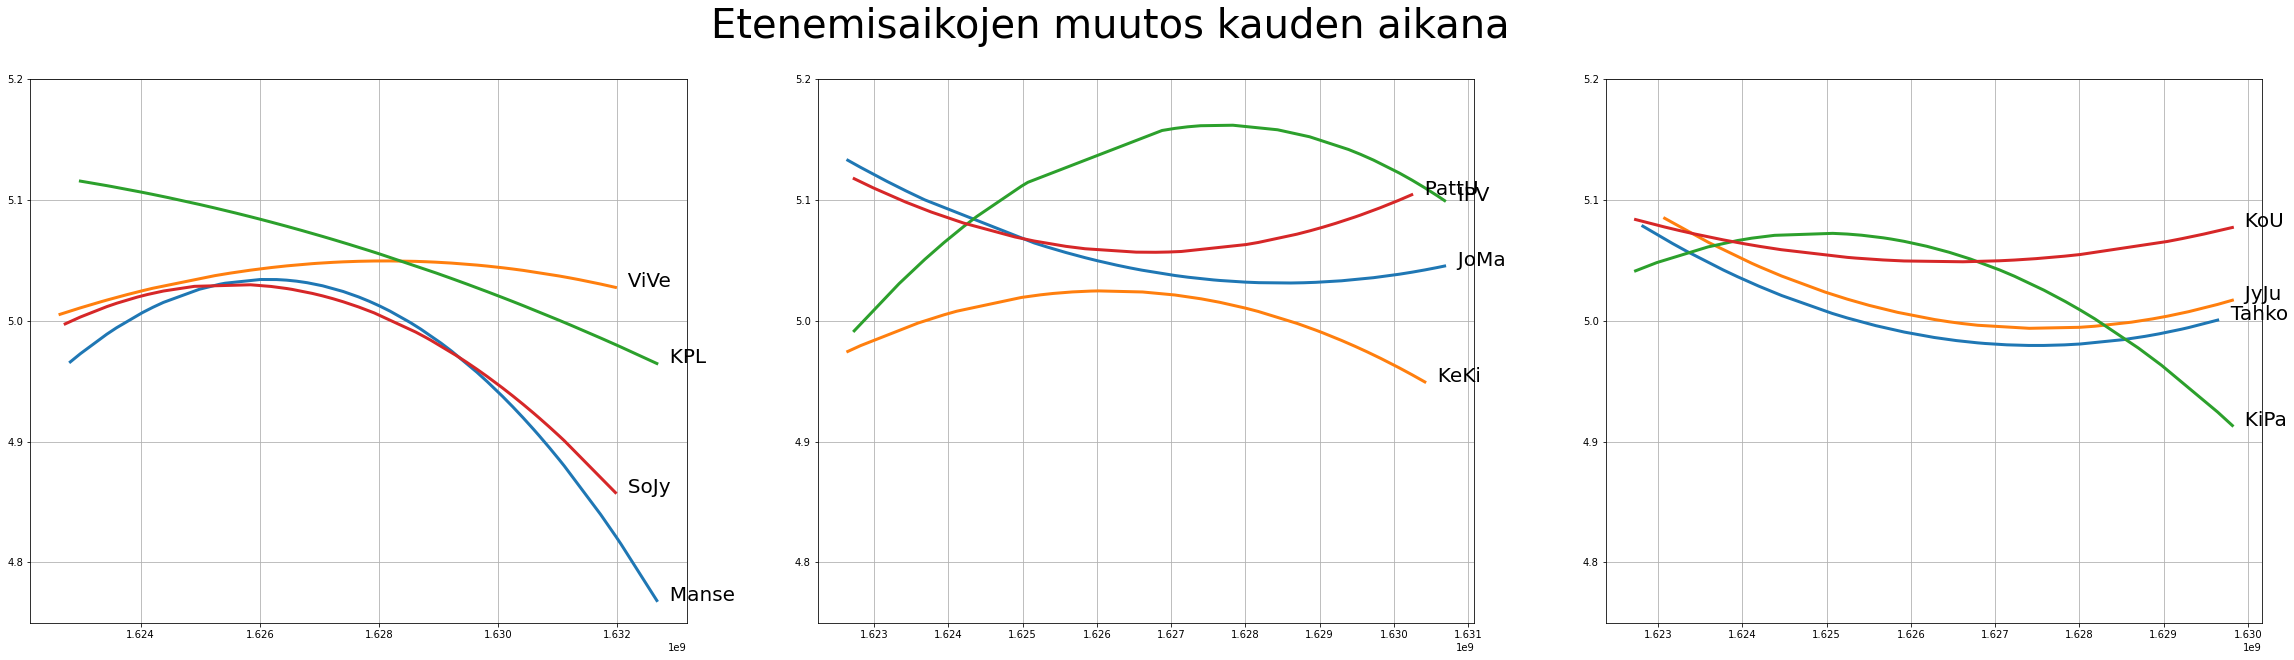

In [3]:
runs = all_runs_msu[all_runs_msu['base'] == 3]
runs = runs[runs['aika'] < 5.6]
# runs = runs[runs['aika'] < 6]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (40, 10))
# for id in [1001, 1002, 1003, 1008]

poly = 2

# axs = [ax1, ax2, ax3, ax4]

for i, ax in enumerate(axs.flatten()):
    for id in teams_msu[i]:
        team_runs = runs[runs['team'] == id]
        y = team_runs['juoksu']
        x = team_runs['unix_time']
        mean_line = ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, poly))(np.unique(x)), label=id, lw=3)
        b = mean_line[0].get_data()
        ax.text(b[0][-1], b[1][-1], f'  {msu[id]}', fontsize=20)
        
        if(id == 1):
            by_day = team_runs.groupby(by='unix_time').mean()
            ax.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
        
    ax.set_ylim([4.75, 5.2])
    ax.grid()
    
fig.suptitle('Etenemisaikojen muutos kauden aikana', fontsize=40, fontweight="normal")

[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]
1
2
3


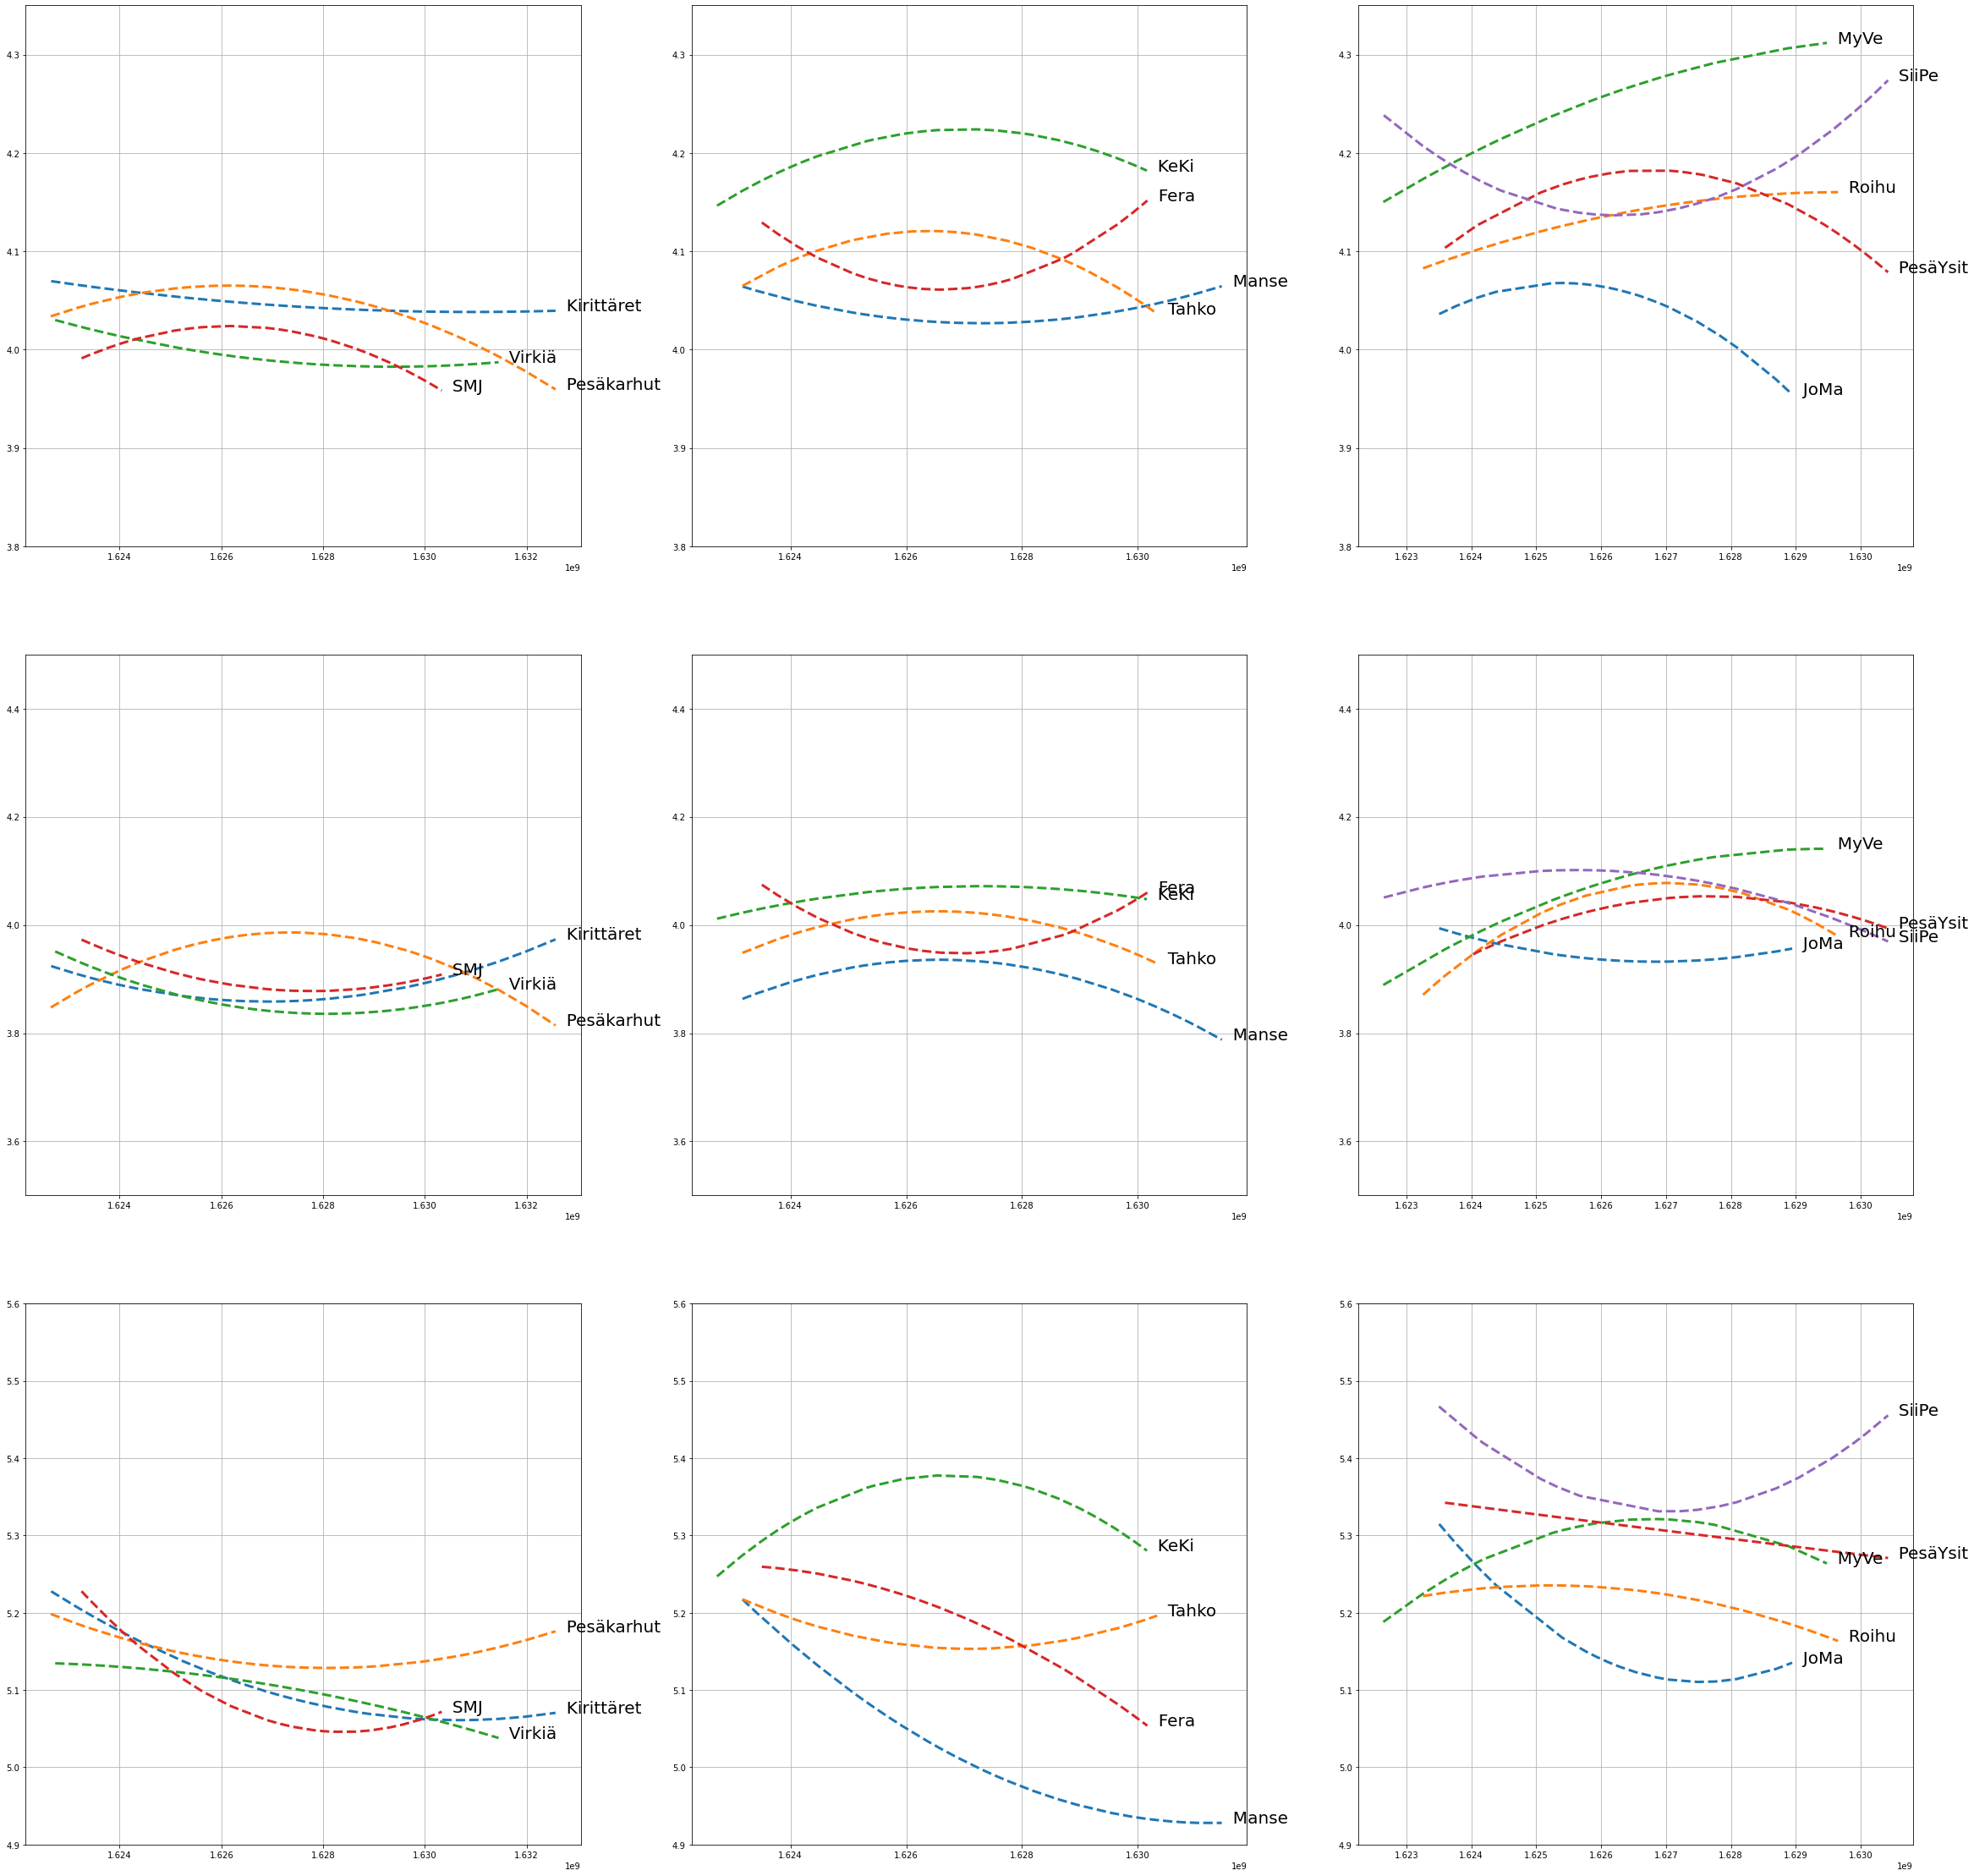

In [4]:
teams_msu = [
    [1004, 1002, 1006, 1005],
    [1009, 1011, 1008, 1013],
    [1003, 1007, 1012, 1001],
    [1010, 1014, 1015]
]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize = (40, 40))

teams_nsu = [
    [2005, 2010, 2006, 2011],
    [2007, 2002, 2004, 2001],
    [2003, 2013, 2008, 2009, 2012]
]

bases = [1, 2, 3]

lims = {
    0: [3.8, 4.35],
    1: [3.5, 4.5],
    2: [4.9, 5.6]
}

poly = 2

print(axs)
for row_index, row in enumerate(axs):
    print(row_index + 1)
    runs = all_runs_nsu[all_runs_nsu['base'] == row_index + 1]
    # runs = runs[runs['aika'] < 6.6]
    
    for i, ax in enumerate(row):
        for id in teams_nsu[i]:
            team_runs = runs[runs['team'] == id]
            y = team_runs['juoksu']
            x = team_runs['unix_time']
            mean_line = ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, poly))(np.unique(x)), label=id, lw=3, ls="--")
            b = mean_line[0].get_data()
            ax.text(b[0][-1], b[1][-1], f'  {nsu[id]}', fontsize=20)

        if(id == 1):
            by_day = team_runs.groupby(by='unix_time').mean()
            ax.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
        
        ax.set_ylim(lims[row_index])
        ax.grid()

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
1
2
3


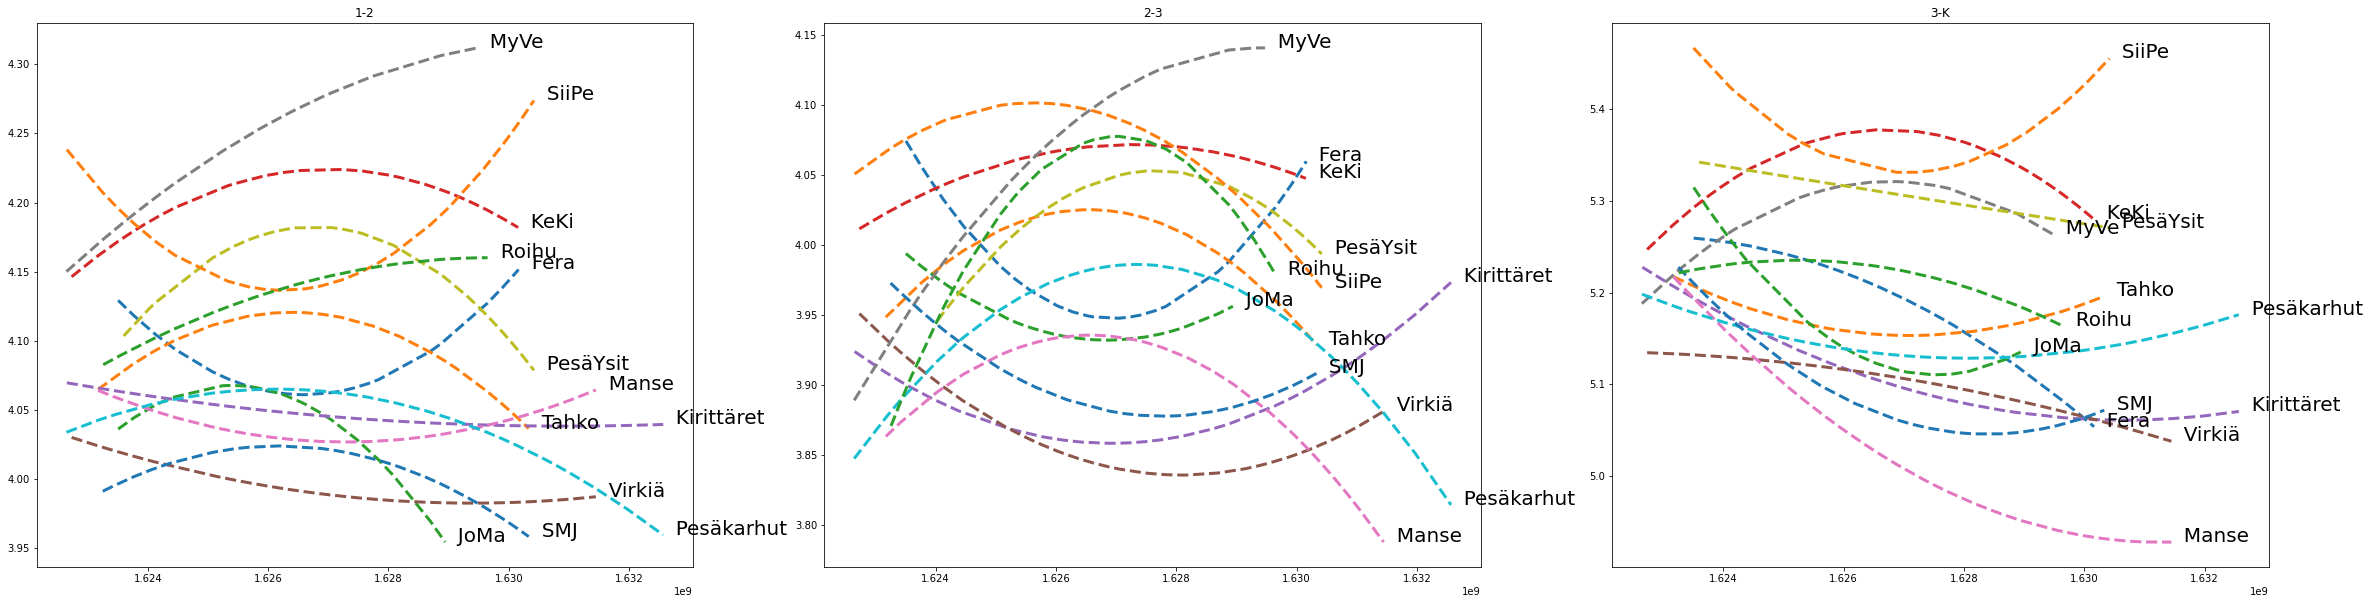

In [18]:
teams_msu = [
    [1004, 1002, 1006, 1005],
    [1009, 1011, 1008, 1013],
    [1003, 1007, 1012, 1001],
    [1010, 1014, 1015]
]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (40, 10))

teams_nsu = [
    [2005, 2010, 2006, 2011],
    [2007, 2002, 2004, 2001],
    [2003, 2013, 2008, 2009, 2012]
]

bases = [1, 2, 3]

lims = {
    0: [3.8, 4.35],
    1: [3.5, 4.5],
    2: [4.9, 5.6]
}

bases_names = [
    '1-2',
    '2-3',
    '3-K'
]

poly = 2

print(axs)
for row_index, ax in enumerate(axs):
    print(row_index + 1)
    runs = all_runs_nsu[all_runs_nsu['base'] == row_index + 1]
    # runs = runs[runs['aika'] < 6.6]

    for id in range(2001, 2014):
        team_runs = runs[runs['team'] == id]
        y = team_runs['juoksu']
        x = team_runs['unix_time']
        mean_line = ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, poly))(np.unique(x)), label=id, lw=3, ls="--")
        b = mean_line[0].get_data()
        ax.text(b[0][-1], b[1][-1], f'  {nsu[id]}', fontsize=20)

    if(id == 1):
        by_day = team_runs.groupby(by='unix_time').mean()
        ax.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
        
        ax.set_ylim(lims[row_index])
        ax.grid()
        
    ax.title.set_text(bases_names[row_index])

[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
1
2
3


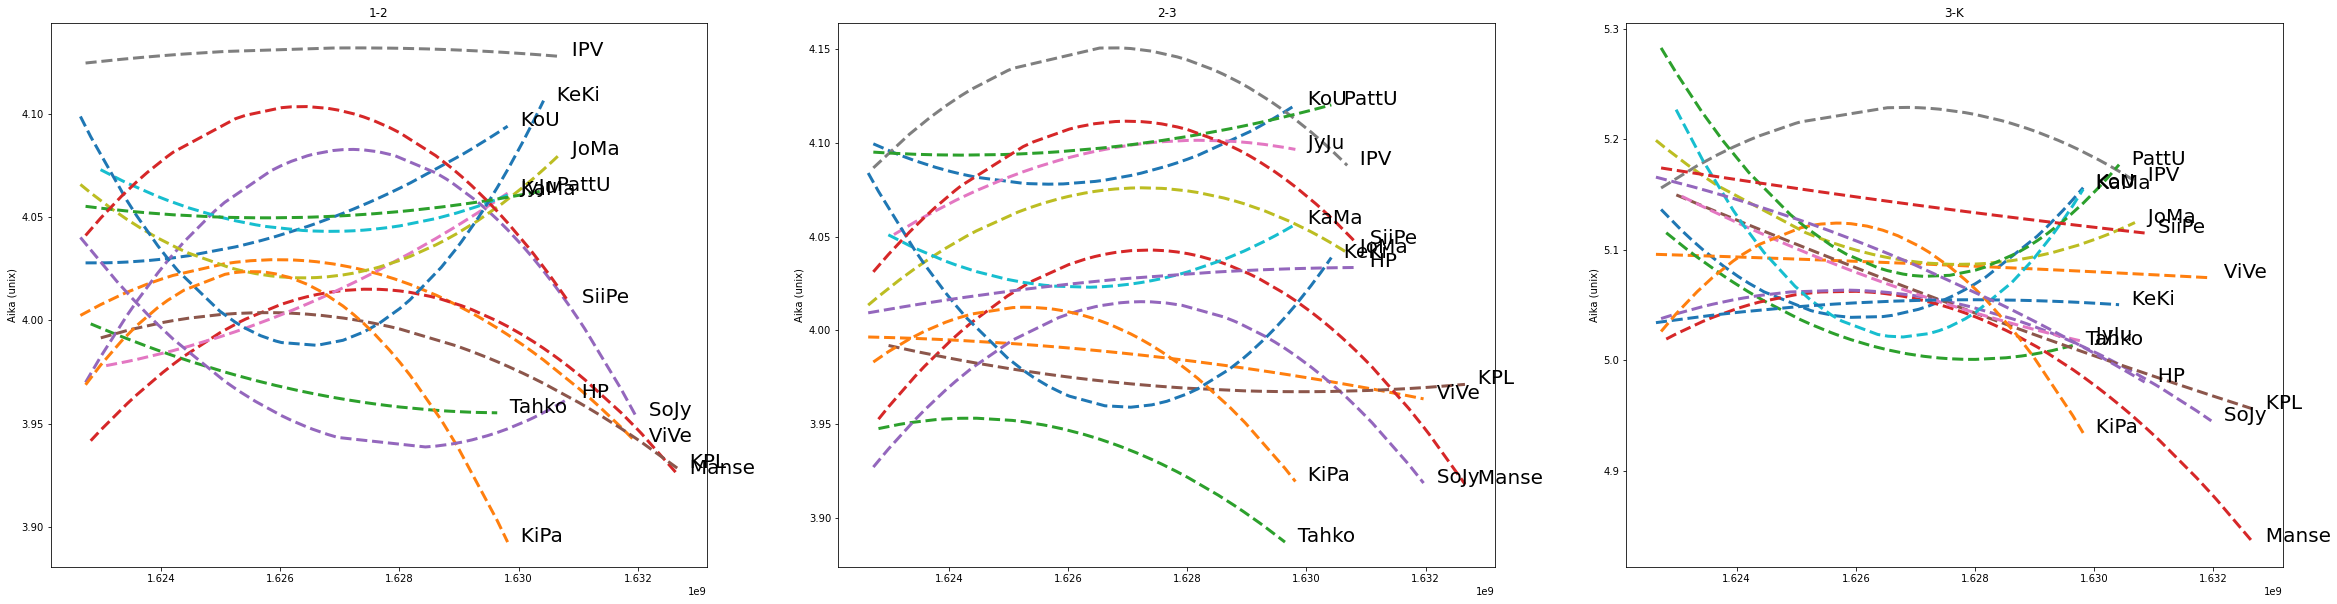

In [17]:
teams_msu = [
    [1004, 1002, 1006, 1005],
    [1009, 1011, 1008, 1013],
    [1003, 1007, 1012, 1001],
    [1010, 1014, 1015]
]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize = (40, 10))

teams_nsu = [
    [2005, 2010, 2006, 2011],
    [2007, 2002, 2004, 2001],
    [2003, 2013, 2008, 2009, 2012]
]

bases = [1, 2, 3]

lims = {
    0: [3.8, 4.35],
    1: [3.5, 4.5],
    2: [4.9, 5.6]
}

bases_names = [
    '1-2',
    '2-3',
    '3-K'
]

poly = 2

print(axs)
for row_index, ax in enumerate(axs):
    print(row_index + 1)
    runs = all_runs_msu[all_runs_msu['base'] == row_index + 1]
    # runs = runs[runs['aika'] < 6.6]

    for id in range(1001, 1016):
        team_runs = runs[runs['team'] == id]
        y = team_runs['juoksu']
        x = team_runs['unix_time']
        mean_line = ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, poly))(np.unique(x)), label=msu[id], lw=3, ls="--")
        b = mean_line[0].get_data()
        ax.text(b[0][-1], b[1][-1], f'  {msu[id]}', fontsize=20)
    
    # ax.legend()
    ax.set_ylabel('Etenemisaika')
    ax.set_ylabel('Aika (unix)')
    ax.title.set_text(bases_names[row_index])

    if(id == 1):
        by_day = team_runs.groupby(by='unix_time').mean()
        ax.plot(by_day.juoksu, marker='o', markersize=1, label="Päivittäinen keskiarvo", color="g")
        
        ax.set_ylim(lims[row_index])
        ax.grid()

In [36]:
all_runs_msu = pd.read_csv('./runs_msu_2021.csv', low_memory=False)
all_runs_nsu = pd.read_csv('./runs_nsu_2021.csv', low_memory=False)

In [67]:
for base in [1, 2, 3]:
    for league in ['msu', 'nsu']:
        runit = all_runs_msu
        if league == 'nsu':
            runit = all_runs_nsu

        by_base = runit[runit['base'] == base]
        by_team = by_base.groupby(by="team").mean()
        by_team = by_team.sort_values(by="juoksu")
        
        by_team.drop(by_team.columns.difference(['team','juoksu']), 1, inplace=True)
        
        for i in by_team.index:
            if league == 'msu':
                by_team.at[i, "nimi"] = msu[i]
            else:
                by_team.at[i, "nimi"] = nsu[i]
                
        by_team.index.names = ['team_id']
                
        print(base)
        print(league)
        display(by_team)

1
msu


,juoksu,nimi
team_id,,
1015,3.963610,HP
1003,3.969791,Tahko
1006,3.985845,KPL
1004,3.988379,Manse
1012,3.992913,KiPa
1002,4.005570,ViVe
1007,4.013218,JyJu
1005,4.036818,SoJy
1011,4.036983,KeKi


1
nsu


,juoksu,nimi
team_id,,
2006,3.992878,Virkiä
2011,4.001398,SMJ
2010,4.036127,Pesäkarhut
2007,4.041684,Manse
2003,4.043830,JoMa
2005,4.045172,Kirittäret
2002,4.086091,Tahko
2001,4.092187,Fera
2013,4.132991,Roihu


2
msu


,juoksu,nimi
team_id,,
1003,3.935127,Tahko
1006,3.973518,KPL
1002,3.982633,ViVe
1005,3.983060,SoJy
1012,3.990694,KiPa
1011,3.995497,KeKi
1004,4.004796,Manse
1015,4.026464,HP
1010,4.034487,KaMa


2
nsu


,juoksu,nimi
team_id,,
2006,3.861141,Virkiä
2005,3.886863,Kirittäret
2007,3.888490,Manse
2011,3.901916,SMJ
2010,3.940438,Pesäkarhut
2003,3.946854,JoMa
2002,3.991348,Tahko
2001,3.994165,Fera
2013,4.009774,Roihu


3
msu


,juoksu,nimi
team_id,,
1004,5.003636,Manse
1005,5.032563,SoJy
1003,5.033916,Tahko
1011,5.050236,KeKi
1006,5.051415,KPL
1015,5.061888,HP
1007,5.075007,JyJu
1001,5.078634,KoU
1012,5.082867,KiPa


3
nsu


,juoksu,nimi
team_id,,
2007,4.994166,Manse
2011,5.094917,SMJ
2006,5.095748,Virkiä
2005,5.108811,Kirittäret
2010,5.143266,Pesäkarhut
2003,5.160728,JoMa
2002,5.171111,Tahko
2001,5.196880,Fera
2013,5.208882,Roihu


In [69]:
for base in [1, 2, 3]:
    for league in ['msu', 'nsu']:
        runit = all_runs_msu
        if league == 'nsu':
            runit = all_runs_nsu

        by_base = runit[runit['base'] == base]
        by_team = by_base.groupby(by="team").mean()
        by_team = by_team.sort_values(by="aika")
        
        by_team.drop(by_team.columns.difference(['team','aika']), 1, inplace=True)
        
        for i in by_team.index:
            if league == 'msu':
                by_team.at[i, "nimi"] = msu[i]
            else:
                by_team.at[i, "nimi"] = nsu[i]
                
        by_team.index.names = ['team_id']
                
        print(base)
        print(league)
        display(by_team)

1
msu


,aika,nimi
team_id,,
1003,4.284973,Tahko
1015,4.305090,HP
1002,4.339543,ViVe
1006,4.348077,KPL
1012,4.354424,KiPa
1004,4.362593,Manse
1013,4.366509,PattU
1007,4.369956,JyJu
1009,4.371226,JoMa


1
nsu


,aika,nimi
team_id,,
2011,4.354711,SMJ
2003,4.363162,JoMa
2006,4.379255,Virkiä
2010,4.394725,Pesäkarhut
2005,4.414137,Kirittäret
2007,4.415113,Manse
2002,4.458946,Tahko
2001,4.515119,Fera
2013,4.515147,Roihu


2
msu


,aika,nimi
team_id,,
1003,4.261923,Tahko
1002,4.311617,ViVe
1005,4.325235,SoJy
1006,4.330903,KPL
1012,4.348595,KiPa
1011,4.358276,KeKi
1004,4.368335,Manse
1015,4.381929,HP
1009,4.389724,JoMa


2
nsu


,aika,nimi
team_id,,
2006,4.224142,Virkiä
2005,4.246672,Kirittäret
2011,4.263340,SMJ
2007,4.305509,Manse
2003,4.323509,JoMa
2010,4.328941,Pesäkarhut
2013,4.387809,Roihu
2002,4.390545,Tahko
2001,4.400586,Fera


3
msu


,aika,nimi
team_id,,
1003,5.542409,Tahko
1011,5.604287,KeKi
1012,5.640546,KiPa
1009,5.663576,JoMa
1013,5.690105,PattU
1006,5.708416,KPL
1007,5.720142,JyJu
1005,5.722746,SoJy
1008,5.753479,IPV


3
nsu


,aika,nimi
team_id,,
2003,5.785171,JoMa
2006,5.815602,Virkiä
2007,5.824954,Manse
2011,5.860365,SMJ
2005,5.919993,Kirittäret
2010,5.931847,Pesäkarhut
2001,5.934160,Fera
2008,5.979597,MyVe
2013,6.028820,Roihu


In [ ]:
        for i in by_team.index:
            if league == 'msu':
                by_team.at[i, "joukkue"] = msu[i]
            else:
                by_team.at[i, "joukkue"] = nsu[i]